In [1]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn joblib


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
data_size = 1000

weight = np.random.randint(45, 100, size=data_size)           
age = np.random.randint(18, 60, size=data_size)               
temperature = np.random.randint(20, 40, size=data_size)       
activity_level = np.random.randint(1, 5, size=data_size)      


water_intake = (
    0.033 * weight +             
    0.02 * activity_level +
    0.005 * (temperature - 25) -
    0.003 * (age - 30) +
    np.random.normal(0, 0.05, size=data_size)  
)


water_intake = np.clip(water_intake, 1.0, 5.0)
water_intake = np.round(water_intake, 2)


df = pd.DataFrame({
    'weight': weight,
    'age': age,
    'temperature': temperature,
    'activity_level': activity_level,
    'water_intake': water_intake
})
df.to_csv("water_intake_data.csv", index=False)
df.head()


,weight,age,temperature,activity_level,water_intake
0,83,36,26,3,2.74
1,96,38,29,3,3.29
2,73,22,38,2,2.56
3,59,35,38,2,2.07
4,87,45,31,3,2.97


   weight  age  temperature  activity_level  water_intake
0      83   36           26               3          2.74
1      96   38           29               3          3.29
2      73   22           38               2          2.56
3      59   35           38               2          2.07
4      87   45           31               3          2.97


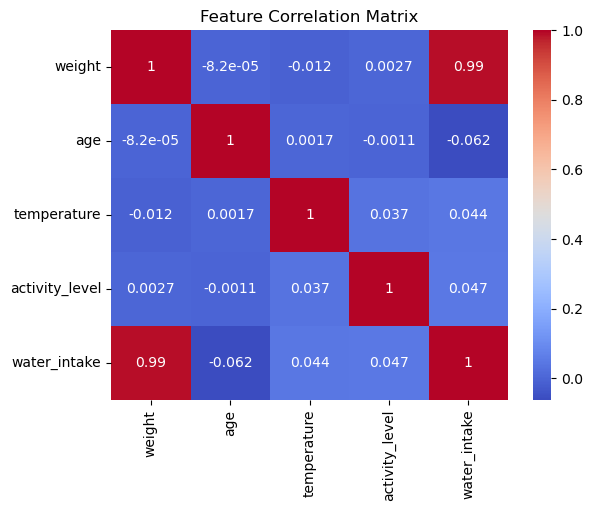

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("water_intake_data.csv")
print(df.head())

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("water_intake", axis=1)
y = df["water_intake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f" R² Score: {r2:.4f}")
print(f" MAE: {mae:.4f} liters")
print(f" RMSE: {rmse:.4f} liters")


 R² Score: 0.9886
 MAE: 0.0436 liters
 RMSE: 0.0559 liters


In [7]:
import joblib

joblib.dump(model, "water_intake_model.pkl")

# Predict sample
sample = np.array([[70, 25, 32, 3]])  # [weight, age, temperature, activity_level]
prediction = model.predict(sample)
print(" Predicted Daily Water Intake:", round(prediction[0], 2), "liters")


 Predicted Daily Water Intake: 2.39 liters
